# Simulação Monte Carlo

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'BBDC4.SA' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [2]:
S0 = data.iloc[-1]
S0

BBDC4.SA    22.450001
Name: 2020-07-06 00:00:00, dtype: float64

In [3]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [5]:
price_list[0] = S0
price_list

array([[22.45000076, 22.45000076, 22.45000076, ..., 22.45000076,
        22.45000076, 22.45000076],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [6]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [7]:
price_list

array([[22.45000076, 22.45000076, 22.45000076, ..., 22.45000076,
        22.45000076, 22.45000076],
       [22.5601621 , 22.56696594, 21.77689129, ..., 23.26515105,
        22.24422753, 22.83464603],
       [23.19510064, 21.90478947, 21.75223655, ..., 23.22472254,
        23.09194221, 22.11983684],
       ...,
       [52.58084548, 39.87222968, 16.7043247 , ..., 18.60585741,
        18.74400871, 44.40518909],
       [50.51644864, 38.7123223 , 16.69884644, ..., 18.34881319,
        18.11210284, 45.31170188],
       [50.35130178, 40.44628827, 16.21622744, ..., 18.74225381,
        18.28271658, 45.87292202]])

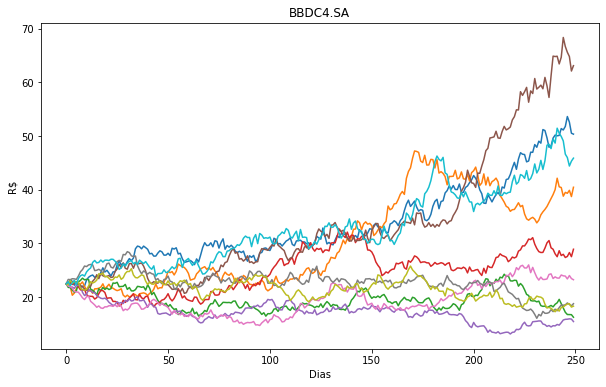

In [8]:
plt.figure(figsize=(10,6))
plt.xlabel('Dias')
plt.ylabel('R$')
plt.title(ticker)
plt.plot(price_list);